# Análise de Posição

Professor Paulo Victor

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

O objetivo da análise de posição é: 

* Determinar a configuração (pose) do mecanismo para uma entrada específica, ou para um conjunto de entradas no caso de sistemas com mais de um grau de liberdade.

Nesta disciplinas, consideraremos apenas sistemas planares (mecanismos em 2D).

A análise de posição pode ser feita por:

* Métodos gráficos, ou trigonométricos;
* Métodos algébricos (analíticos).

## Método Gráfico/Trigonométrico

In [6]:
from IPython.display import Image

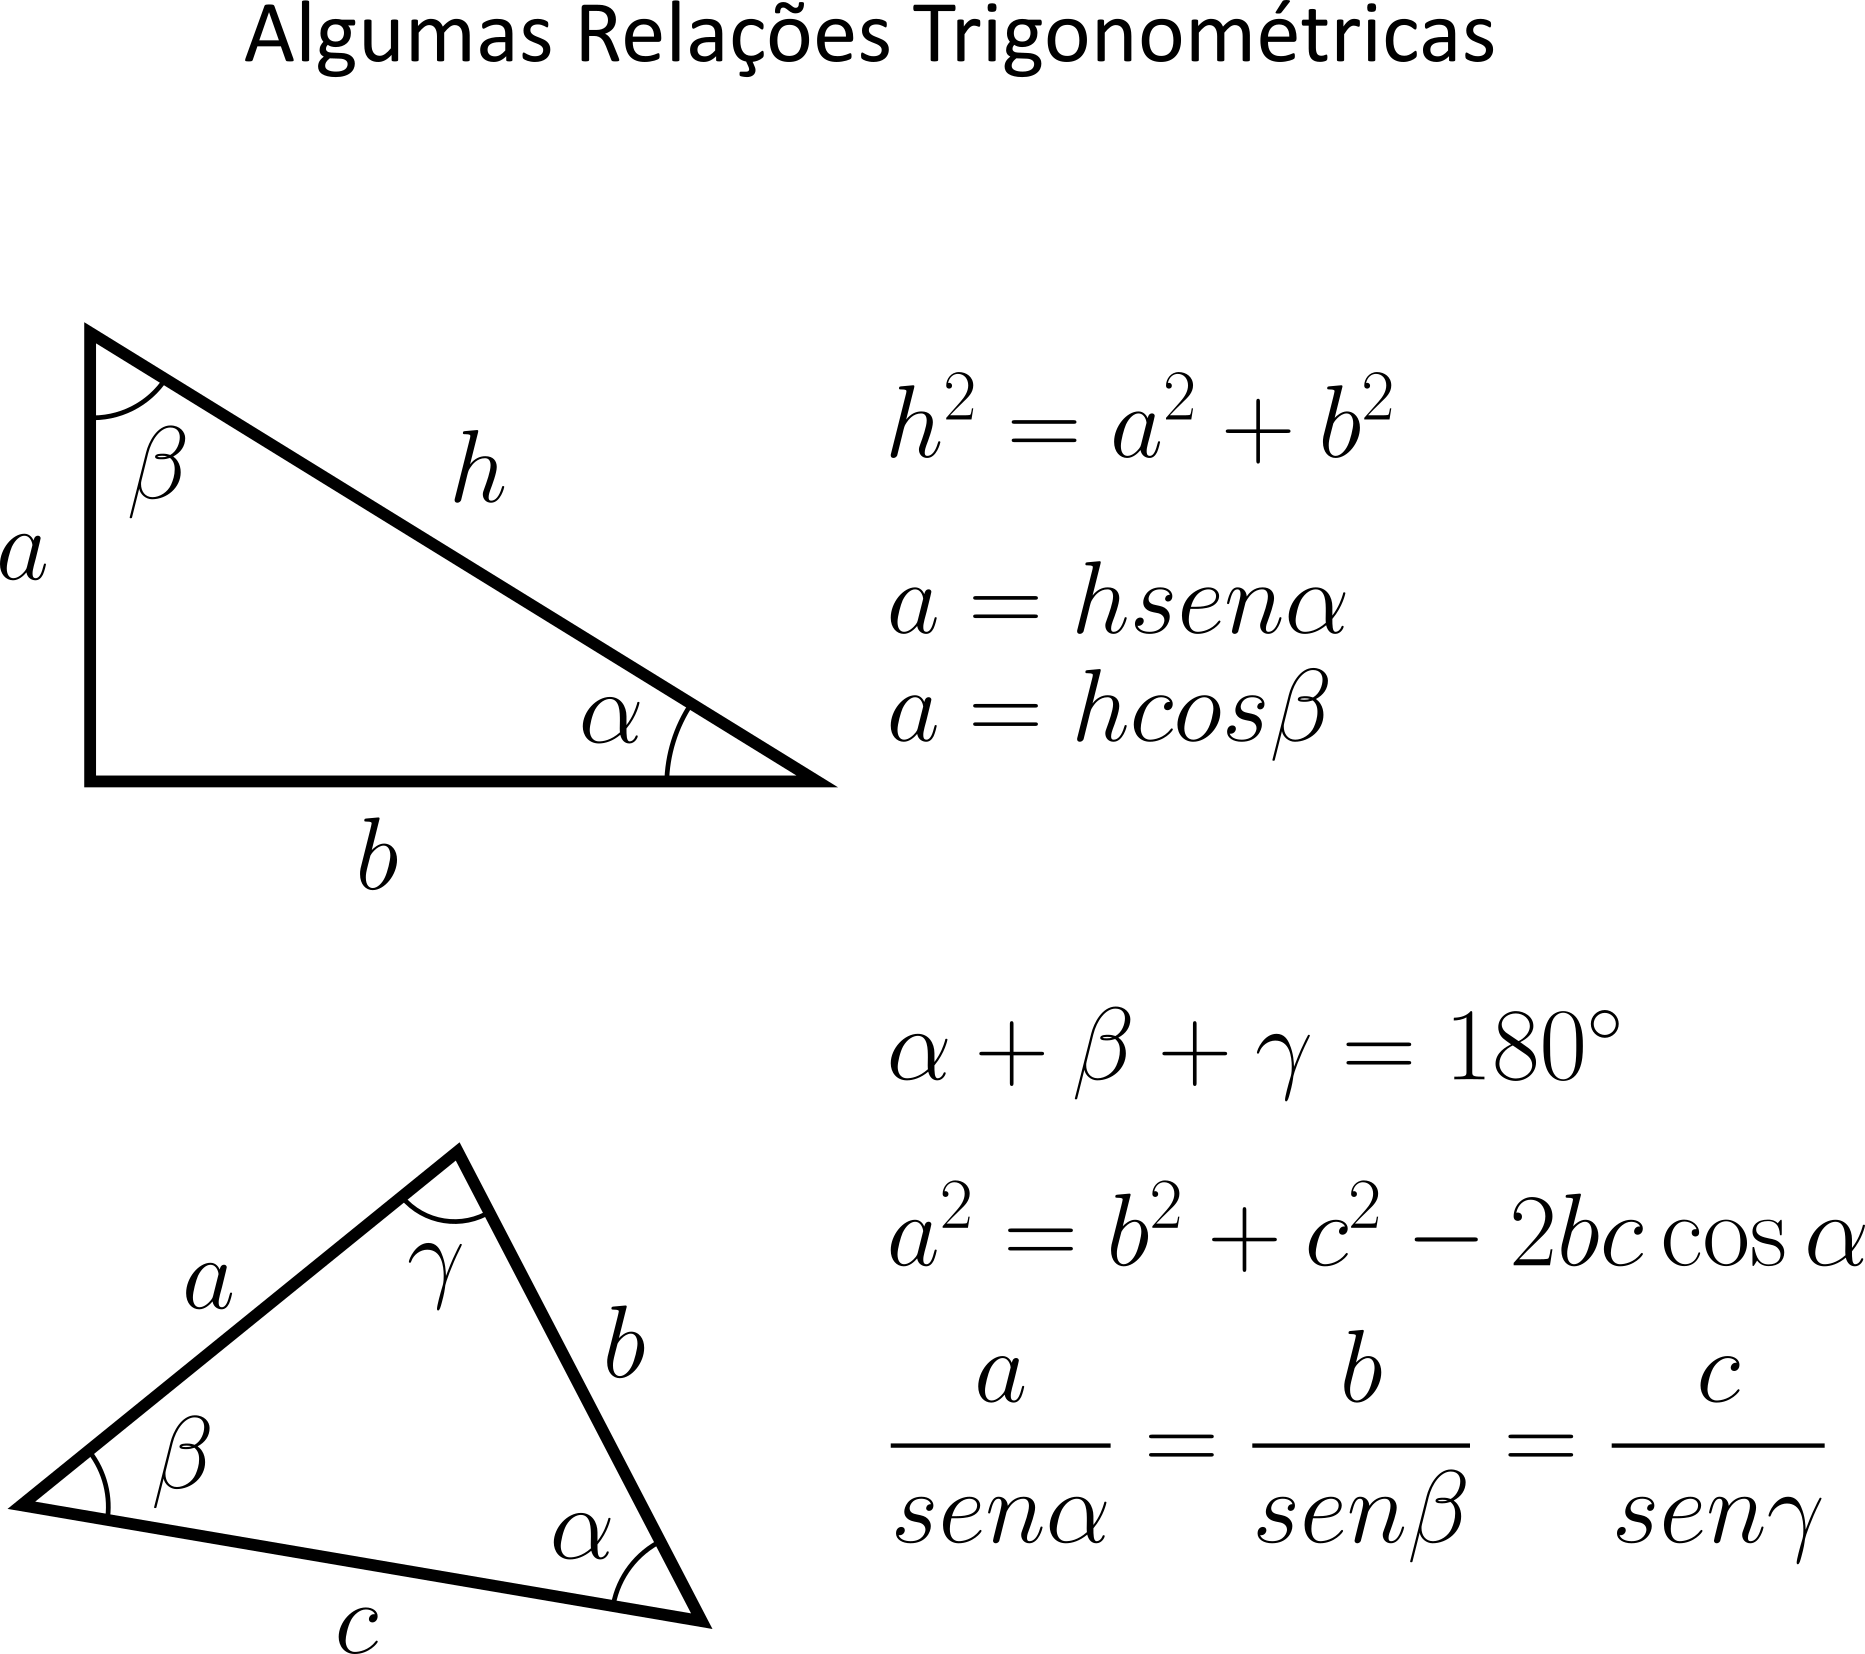

In [7]:
Image('figuras/trig.png',width=500)

**Exemplo:** 

Obtenha os ângulos $\theta_3$ e $\theta_4$ e a posição do ponto $B$ para um mecanismo de 4 barras com as seguintes dimensões: $a$ = 90mm, $b$ = 140mm, $c$ = 120mm, $d$ = 140mm. 

Considere um ângulo de entrada $\theta_2$ = 30${}^{\circ}$.



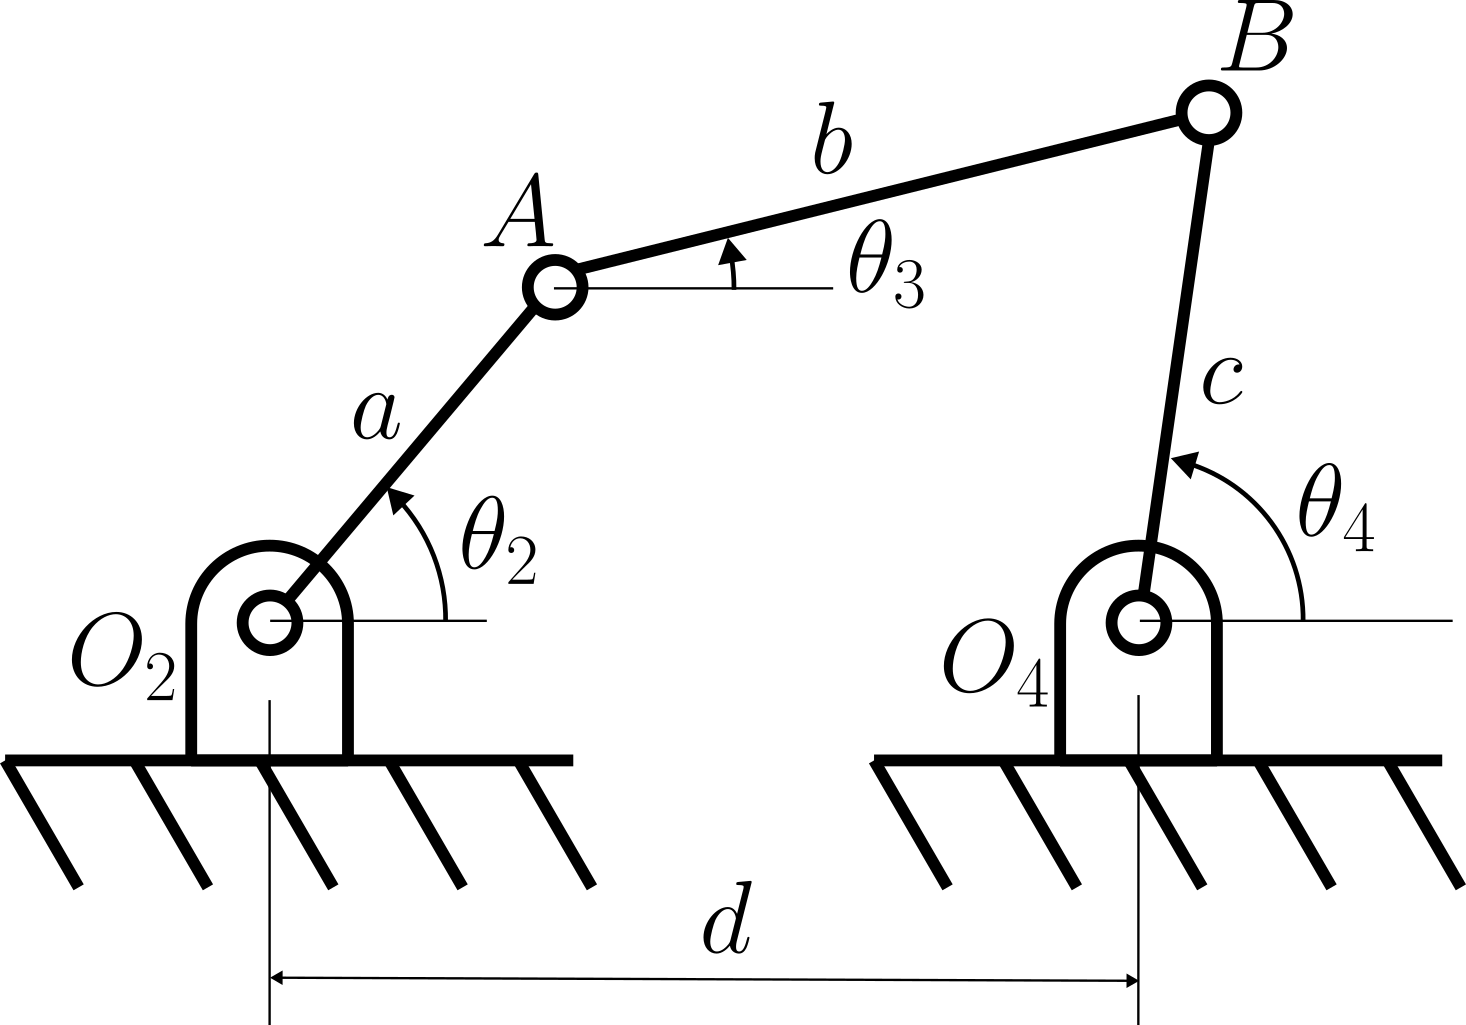

In [9]:
Image('figuras/4barras-ex.png',width=500)

## Método Analítico

### Vetor Posição

O vetor posição descreve a localização do Ponto $P$ em relação ao ponto $O$. 

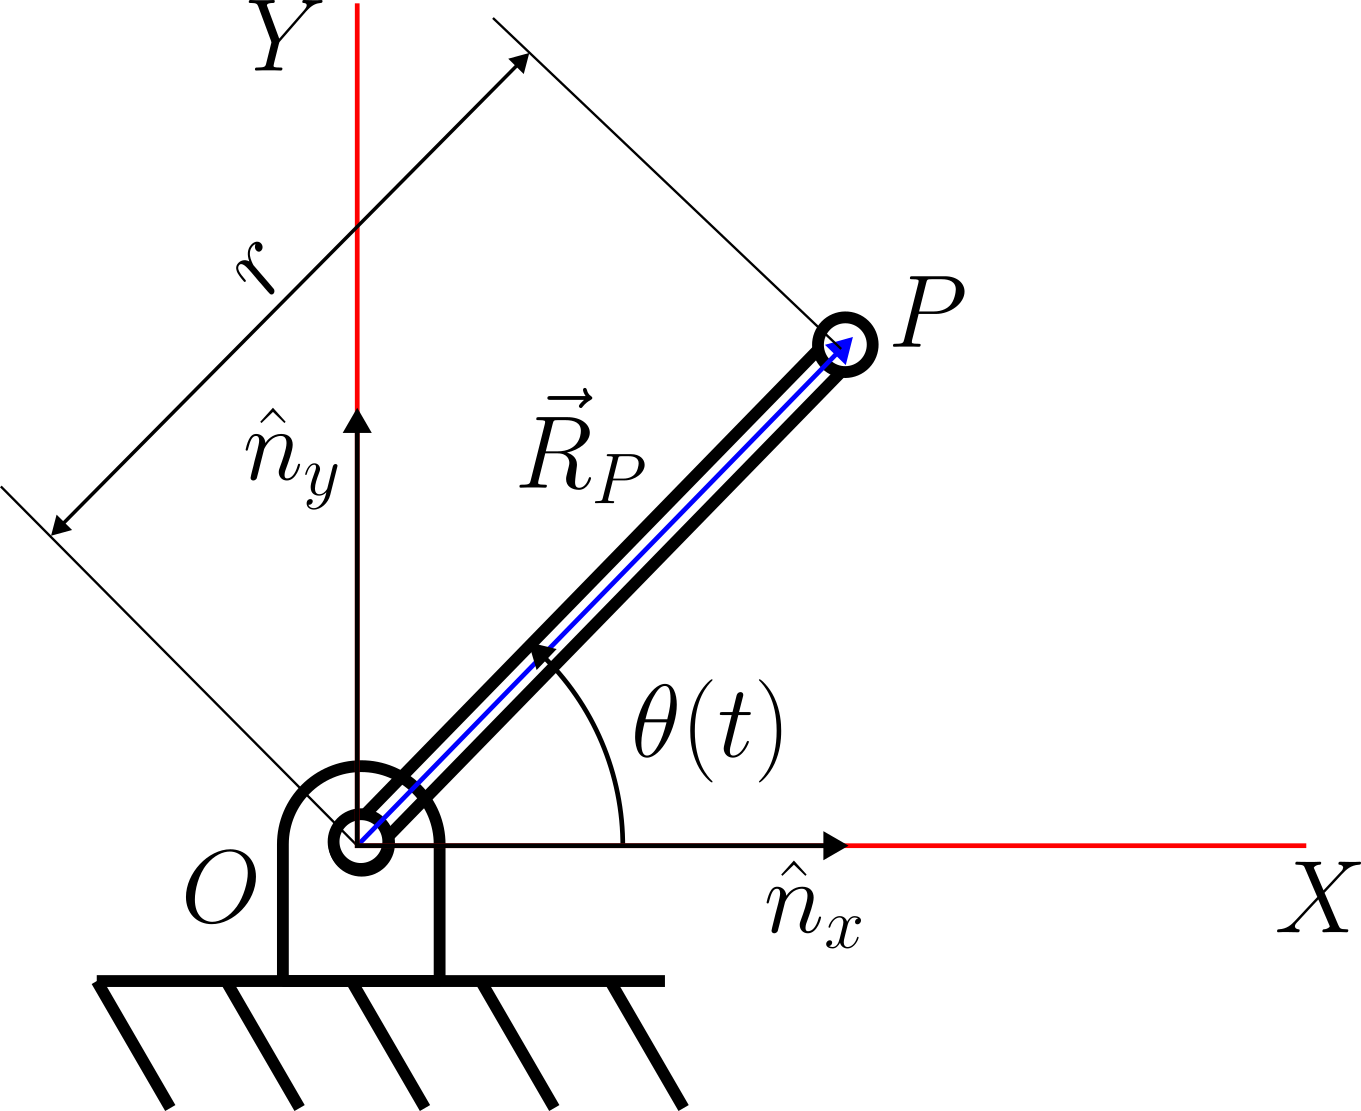

In [13]:
Image('figuras/RP.png',width=500)

O vetor posição do ponto $P$ em relação ao ponto $O$ é representado por: $\vec{R}_{PO}$

Como o ponto $O$ é um ponto fixo e é a origem do sistema de coordenadas, este vetor pode ser escrito como: $\vec{R}_P$

Uma maneira conveniente de se escrever o vetor $\vec{R}_P$ é através de coordenadas polares: $r \angle \theta(t)$

$\vec{R}_P = r cos \theta(t) \hat{n}_x + r sen \theta(t) \hat{n}_y$

Nesta disciplina, por lidarmos apenas com sistemas em 2D, iremos utilizar a representação de vetores no plano complexo. 

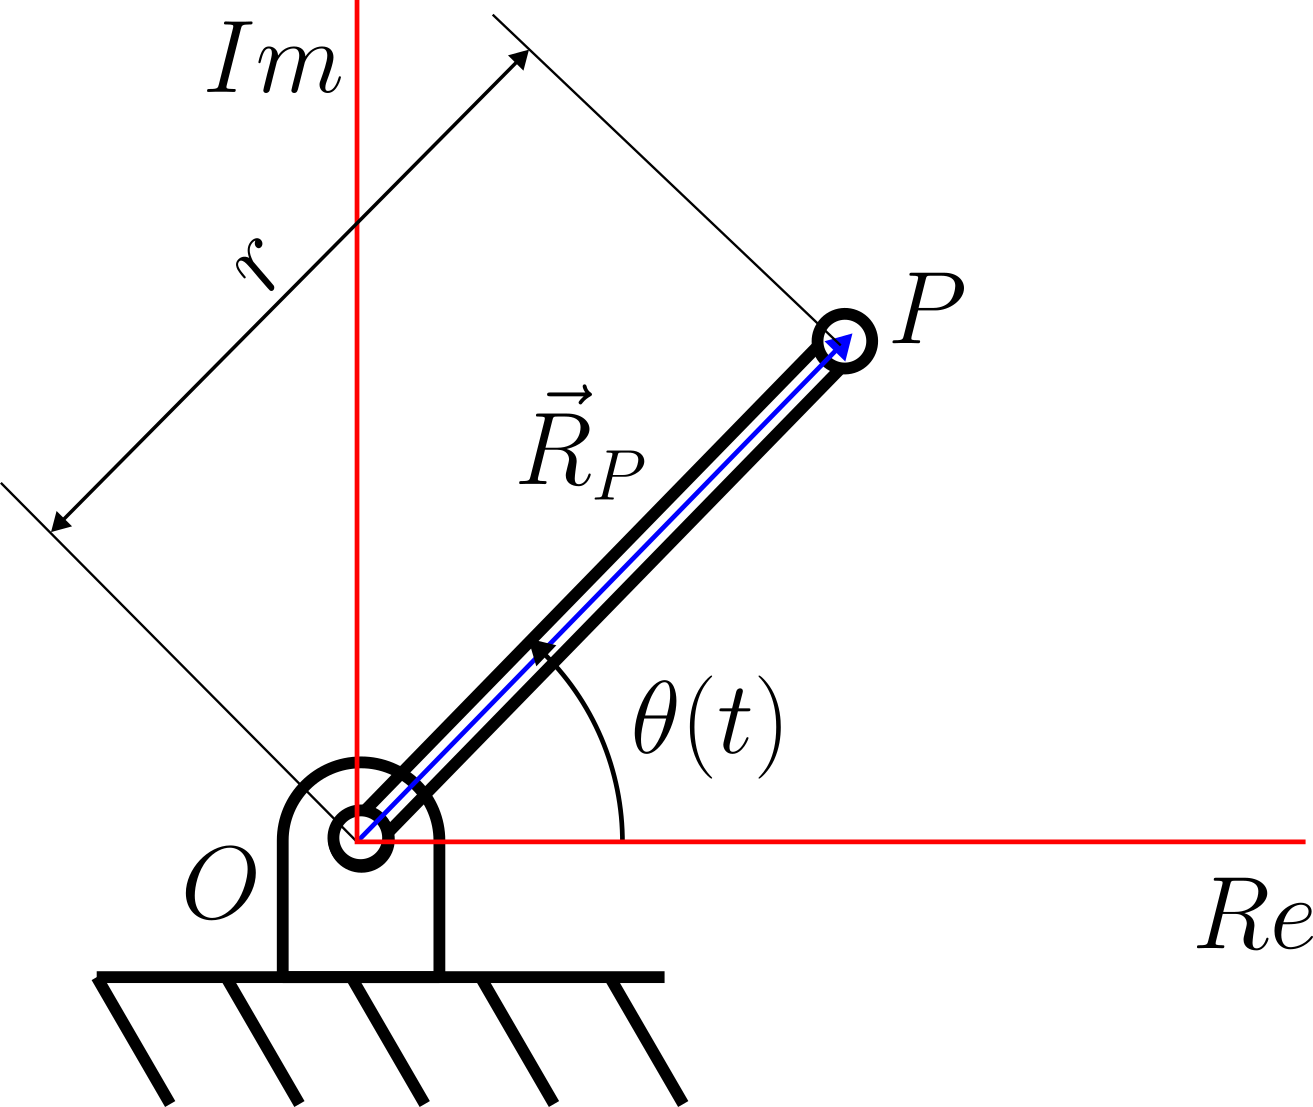

In [17]:
Image('figuras/RP_im.png',width=500)

$\vec{R}_P = r cos \theta(t) + i r sen \theta(t)$

Utilizando a Identidade de Euler:

$\vec{R}_P = r e^{i \theta(t)}$



### Malha de Vetores

Essa aproximação tem algumas vantagens na síntese analítica de mecanismos. Também possui vantagens na análise de velocidades e acelerações dos mecanismos. 

Esse laço termina em si mesmo fazendo com que a somatória dos vetores ao seu redor seja zero. 

Os comprimentos dos vetores são os comprimentos dos elos, todos conhecidos. A posição atual do mecanismo é definida pelo ângulo de entrada $\theta_2$ por ser um mecanismo com 1 GDL. Queremos obter os ângulos desconehcidos $\theta_3$ e $\theta_4$.

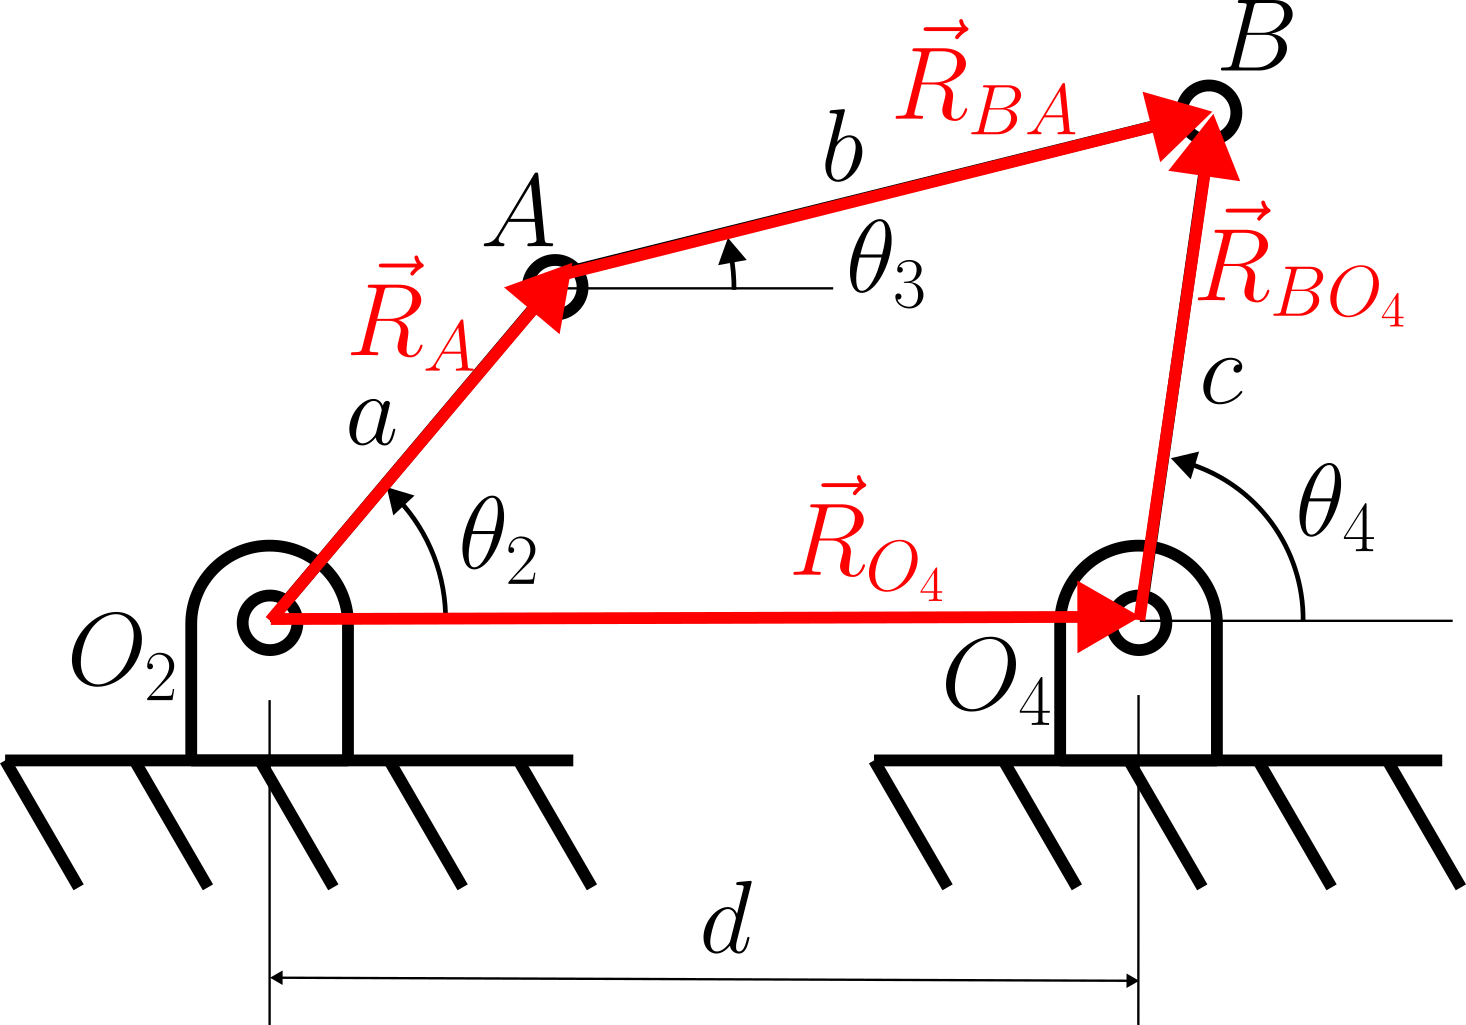

In [21]:
Image('figuras/4barras-malha.png',width=500)

Equação da malha de vetores:

$\vec{R}_{A} + \vec{R}_{BA} - \vec{R}_{BO_4} - \vec{R}_{O_4} $ = 0 

$ ae^{i\theta_2} + be^{i\theta_3} - ce^{i\theta_4} - d = 0 $

Usando a identidade de Euler, separa-se a equação na parte real e imaginária:

$a cos{\theta_2} + ia sen{\theta_2} + b cos{\theta_3} + ib sen{\theta_3} - c cos{\theta_4} - ic sen{\theta_4} - d = 0 $

$\left\{ \begin{array} a cos{\theta_2} + b cos{\theta_3} - c cos{\theta_4} - d = 0\\  a sen{\theta_2} + b sen{\theta_3} - c sen{\theta_4}  = 0 \end{array} \right.$

O próximo passo é resolver este sistema de equações. Muitas vezes, este sistema será não linear, de modo que a solução por métodos numéricos torna-se mais adequada. 

In [25]:
from sympy import *

In [26]:
a,b,c,d = symbols('a b c d',real=True)
th2,th3,th4 = symbols('theta2 theta3 theta4',real=True)

In [27]:
Eq1 = a*exp(I*th2) + b*exp(I*th3) - c*exp(I*th4) - d
Eq(Eq1,0)

Eq(a*exp(I*theta2) + b*exp(I*theta3) - c*exp(I*theta4) - d, 0)

In [28]:
Eq2 = Eq1.rewrite(sin)
Eq(Eq2,0)

Eq(a*(I*sin(theta2) + cos(theta2)) + b*(I*sin(theta3) + cos(theta3)) - c*(I*sin(theta4) + cos(theta4)) - d, 0)

In [29]:
Eq2 = Eq2.expand()
Eq(Eq2,0)

Eq(I*a*sin(theta2) + a*cos(theta2) + I*b*sin(theta3) + b*cos(theta3) - I*c*sin(theta4) - c*cos(theta4) - d, 0)

In [30]:
Eq2_real = re(Eq2)
Eq2_real 

a*cos(theta2) + b*cos(theta3) - c*cos(theta4) - d

In [31]:
Eq2_im = im(Eq2)
Eq2_im

a*sin(theta2) + b*sin(theta3) - c*sin(theta4)

**Solução Numérica:**

In [33]:
valores = {a:90,b:140,c:120,d:140,th2:pi/6}

In [34]:
Eq3_real =Eq2_real.subs(valores)
Eq3_real

140*cos(theta3) - 120*cos(theta4) - 140 + 45*sqrt(3)

In [35]:
Eq3_im = Eq2_im.subs(valores)
Eq3_im

140*sin(theta3) - 120*sin(theta4) + 45

In [36]:
def sistema(th_x):
  dic_func = {th3:th_x[0],th4:th_x[1]}
  return [Eq3_real.subs(dic_func).evalf(),Eq3_im.subs(dic_func).evalf()]

In [37]:
from scipy.optimize import fsolve

In [38]:
sol = fsolve(sistema,[0,0])
sol

array([0.40117921, 0.98016313])

In [39]:
sistema([sol[0],sol[1]]) # erro da solução

[1.77756336984698e-11, 3.11217718262924e-12]

**Visualizando a solução:**

In [41]:
O2 = [0,0]
A = [(a*cos(th2)).subs(valores),(a*sin(th2)).subs(valores)]

In [42]:
B = [(a*cos(th2)+ b*cos(sol[0])).subs(valores),(a*sin(th2)+ b*sin(sol[0])).subs(valores)]
O4 = [d.subs(valores),0]

In [43]:
X = [O2[0],A[0],B[0],O4[0]]
Y = [O2[1],A[1],B[1],O4[1]]

In [44]:
import matplotlib.pyplot as plt

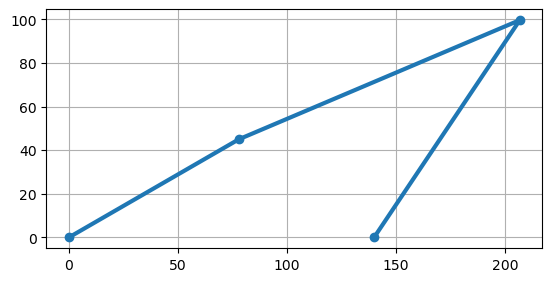

In [45]:
plt.figure()
plt.plot(X,Y,'-o',linewidth=3)
plt.gca().set_aspect('equal',adjustable='box')
plt.grid(True)

## Ângulo de Transmissão

O ângulo de transmissão $\mu$ é definido como o *ângulo entre o elo de saída e o acoplador*. 

Iremos expandir essa definição para representar o ângulo entre quaisquer elos em um mecanismo.  -> O ângulo entre qualquer elo de saída e o acoplador que o movimenta é um ângulo de transmissão. 

Agora que desenvolvemos as expressões analíticas para os ângulos de todos os elos do mecanismo, fica fácil determinar algebricamente o ângulo de transmissão. Ele é apenas a diferença entre os ângulos dos dois elos.

Por convenção, tomamos o valor absoluto da diferença e o forçamos a ser um ângulo agudo. 

$\theta_{trans} = | \theta_3 - \theta_4 |$

se $\theta_{trans} > \pi/2$ então $\mu = \pi - \theta_{trans}$ caso contrário $\mu = \theta_{trans}$

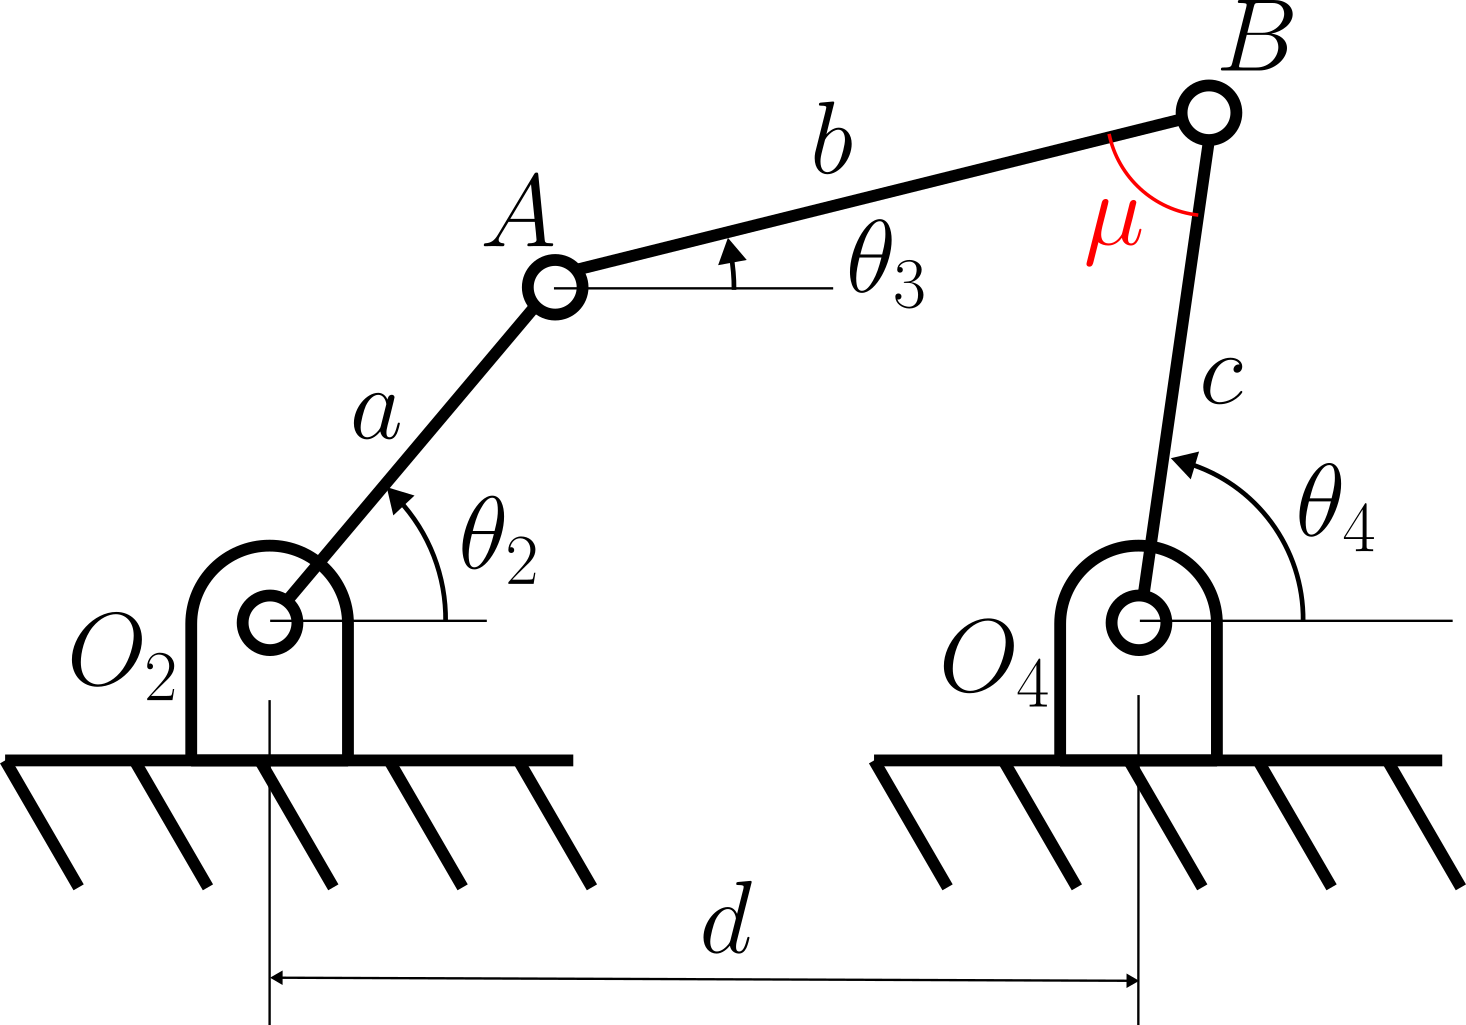

In [48]:
Image('figuras/4barras-ang_trans.png',width=500)